# Oscylator harmoniczny, nietłumiony, bez wymuszenia

### Zadanie 1
Ułóż różniczkowe równanie ruchu nietłumionego oscylatora harmonicznego bez wymuszenia

### Przykładowe rozwiązanie

In [1]:
t = var('t')
k = var('k')
m = var('m')
x = function('x')(t)

assume(k>0)
assume(m>0)

eq = m*diff(x,t,2) == - k*x
show(eq)

m*diff(x(t), t, t) == -k*x(t)

### Zadanie 2
Rozwiąż otrzymane równanie różniczkowe przy warunkach początkowych x(0) = x0, v(0) = v0.

### Przykładowe rozwiązanie

In [1]:
x0 = var('x0')
v0 = var('v0')

x_t = desolve_laplace(eq, x, ivar=t, ics=[0, x0, v0])
show(x_t)

NameError: name 'eq' is not defined

In [3]:
x_t = x_t.expand()
show(x_t)

x0*cos(sqrt(k)*t/sqrt(m)) + sqrt(m)*v0*sin(sqrt(k)*t/sqrt(m))/sqrt(k)

### Zadanie 3
Korzystając z otrzymanego rozwiązania wyznacz wyrażenie na częstość kołową $\omega_0$.

### Przykładowe rozwiązanie

In [4]:
omega_0 = var('omega_0')
assume(omega_0>0)

x_om = x_t.subs(k==m*omega_0^2)
x_om = expand(x_om)
show(x_om)

x0*cos(omega_0*t) + v0*sin(omega_0*t)/omega_0

In [5]:
omega_0 = sqrt(k/m)
show(omega_0)

sqrt(k/m)

### Zadanie 4
Wyznacz okres drgań własnych T0 oraz zbadaj jego zależnośc od masy i stałej sprężystości.

In [6]:
T0 = var('T0')
T0 = 2*pi/omega_0
show(T0)

2*pi/sqrt(k/m)

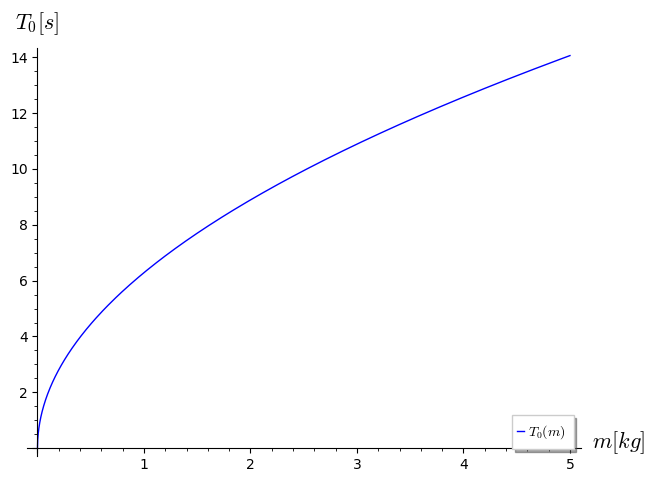

In [68]:
T_m = T0.subs(k==1)
w1 = plot(T_m, (m, 0, 5), axes_labels=[r'$m [kg]$', r'$T_0 [s]$'], \
     legend_label='$T_0(m)$')
w1.set_legend_options(loc = 4)
show(w1)

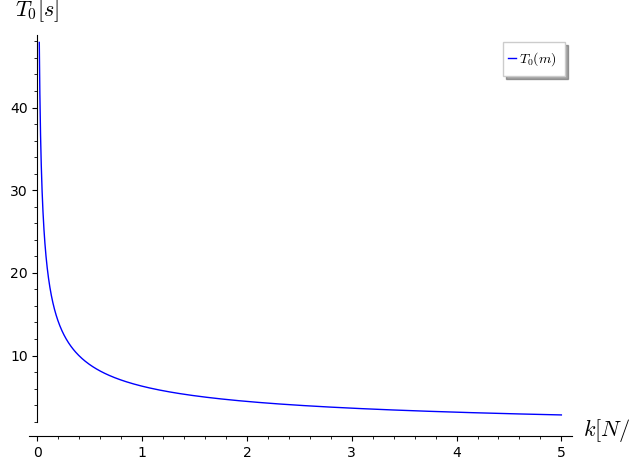

In [7]:
T_k = T0.subs(m==1)
w2 = plot(T_k, (k, 0, 5), axes_labels=[r'$k [N/m]$', r'$T_0 [s]$'], \
     legend_label='$T_0(m)$')
w2.set_legend_options(loc = 1)
show(w2)

### Zadanie 5
Wyrysować rozwiązanie równania różniczkowego oscylatora harmonicznego dla warunków początkowych $x_0 = 1$, $v_0 = 0$ oraz dla $x_0 = 0$, $v_0 = 1$.

### Przykładowe rozwiązanie

In [8]:
show(x_t)

x0*cos(sqrt(k)*t/sqrt(m)) + sqrt(m)*v0*sin(sqrt(k)*t/sqrt(m))/sqrt(k)

In [9]:
x1 = x_t.subs(k==1, m==1, x0=1, v0=0)
show(x1)

cos(t)

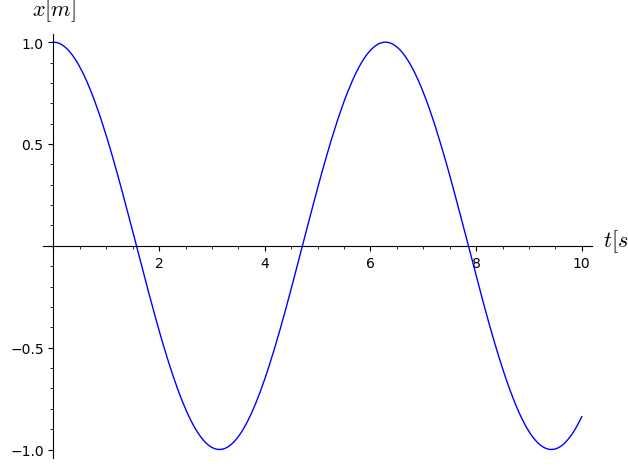

In [10]:
plot(x1, (t, 0, 10), axes_labels=[r'$t [s]$', r'$x [m]$'])

In [11]:
x2 = x_t.subs(k==1, m==1, x0=0, v0=1)
show(x2)

sin(t)

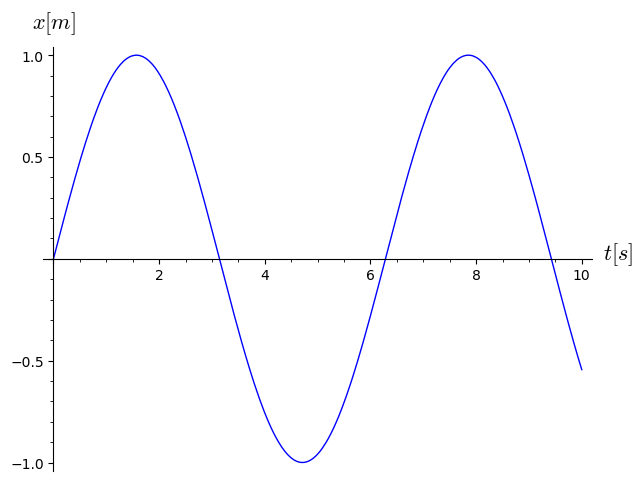

In [85]:
plot(x2, (t, 0, 10), axes_labels=[r'$t [s]$', r'$x [m]$'])

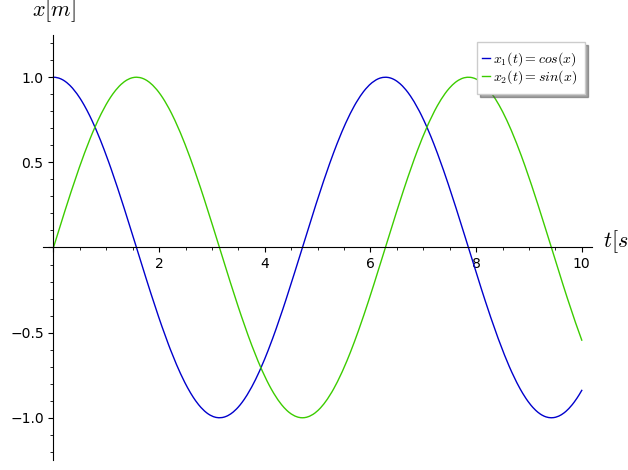

In [12]:
w_x1x2 = plot((x1, x2), (t, 0, 10), ymin = -1.2, ymax = 1.2, \
     axes_labels=[r'$t [s]$', r'$x[m]$'], \
     legend_label=[r'$x_1(t) = cos(x)$', r'$x_2(t) = sin(x)$'])
w_x1x2.set_legend_options(loc = 1)
show(w_x1x2)

### Zadanie 6
Analizując uzyskane wykresy znaleźć okres drgań i porównać go z $T_0$.

In [17]:
x0 = 1
mz1 = find_root(x1, 0, 2)
show(mz1)

1.5707963267948966

In [24]:
pi/omega_0.subs(k==1, m==1)

pi

In [29]:
# dla x0=1, v0=0

x0 = 1
mz1 = find_root(x1, 0, 2)
mz3 = find_root(x1, 6, 8)
Tx1 = mz3-mz1
show(Tx1)

# dla x0=0, v0=1

# mz1 = find_root(x2, 0, 1)
# mz3 = find_root(x2, 6, 8)
# Tx2 = mz3-mz1
# show(Tx2)

6.283185307179587

In [60]:
show(T0.subs(k==1, m==1))

2*pi

### Zadanie 7
Wykreślić przestrzeń fazową dla oscylatora harmonicznego nietłumionego.

In [56]:
m0 = 1
x1 = x_t.subs(k==1, m==m0, x0=1, v0=0)
p1 = var('p1')
p1 = m*diff(x1, t)
p1 = p1.subs(m==m0)
show(p1)

-sin(t)

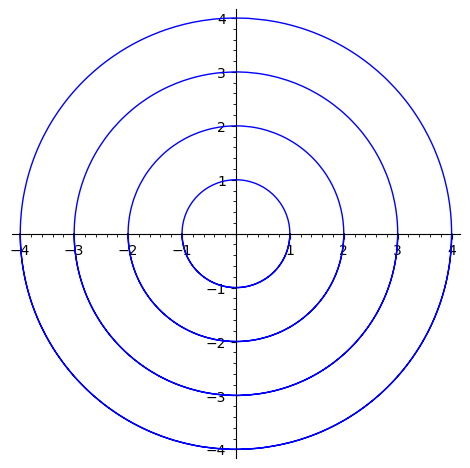

In [57]:
g = Graphics()
for i in range(1, 5):
    x1 = x_t.subs(k==1, m==1, x0=i, v0=0)
    p1 = var('p1')
    p1 = m*diff(x1, t)
    p1 = p1.subs(m==1)
    g += parametric_plot((x1, p1), (t, 0, 3*pi))
g.show()